# E-commerce - Users of C2C Fashion Store Analysis.

# Defining the Question.

### Problem Statement.

E-commerce requires ways of  evaluating gaps in service delivery. Users being the key pillar in this business, means that a great focus should be placed on them to improve user experience. As data scientists working for a C2C fashion retailer, our work will involve analyzing the dataset so as to derive useful insights from it.
 
Objectives

1.To find out the quantity of products sold to customers who use ios and how it compares to those using  android.

2.To find out the percentage of male and female customers.


In [2]:
# Importing Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import stats
import warnings

# Loading the Dataset.

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
# Load dataset file and previewing the dataframe.

#c2c = pd.read_csv('/content/drive/MyDrive/6M-0K-99K.users.dataset.public.csv')
c2c = pd.read_csv('6M-0K-99K.users.dataset.public.csv')

In [6]:
# Previewing the top of the dataset
c2c.head(2)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1.0,mr,True,False,True,True,11.0,3196.0,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2.0,mrs,True,False,True,True,12.0,3204.0,106.80,8.90,mc


In [7]:
# Previewing the bottom of the dataset
c2c.tail(2)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
67291,-4766565163064541304,user,Singapour,en,3,8,0,0,0,0.0,0,0,M,1.0,mr,False,False,False,True,697.0,2858.0,95.27,7.94,sg
67292,3232806664193819845,user,France,fr,3,8,0,0,0,0.0,0,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Information about the Dataset.

In [24]:
# Determining the shape of the dataset
print("Shape of dataset:", c2c.shape)

Shape of dataset: (98913, 24)


In [9]:
# Identifying unique values in each column of the dataset
print("Unique values in each column")
c2c.nunique()

Unique values in each column


identifierHash         67293
type                       1
country                  186
language                   5
socialNbFollowers         90
socialNbFollows           85
socialProductsLiked      412
productsListed            65
productsSold              75
productsPassRate          72
productsWished           272
productsBought            70
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       699
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode              186
dtype: int64

In [10]:
# Checking for column names and their respective data types
print("Column names:", c2c.columns)
print("Datatypes in each column:", c2c.info())

Column names: Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67293 entries, 0 to 67292
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       67293 non-null  int64  
 1   type                 67293 non-null  object 
 2   country              67293 non-null  object 
 3   language             67293 non-null  object 
 4   socialNbFollowers    67293 non-null  int64  
 5   socialNbFollows      67293 non-null  int64  
 6   soc

In [11]:
# Description of the dataset
c2c.describe(include = 'all')

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,6.729300e+04,67293,67293,67293,67293.000000,67293.000000,67293.000000,67293.000000,67293.000000,67293.000000,67293.000000,67293.000000,67293,67292.000000,67292,67292,67292,67292,67292,67292.000000,67292.000000,67292.000000,67292.000000,67292
unique,NaN,1,186,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,2,2,2,2,NaN,NaN,NaN,NaN,186
top,NaN,user,France,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,mrs,False,False,False,True,NaN,NaN,NaN,NaN,fr
freq,NaN,67293,16880,34937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51926,NaN,51558,48907,63925,52134,65562,NaN,NaN,NaN,NaN,16879
mean,-7.472617e+15,NaN,NaN,NaN,3.635386,8.615131,5.985080,0.135170,0.178726,1.193992,2.093338,0.232179,NaN,1.777091,NaN,NaN,NaN,NaN,NaN,573.878247,3134.881368,104.495805,8.708320,NaN
std,5.336279e+18,NaN,NaN,NaN,4.693238,64.061092,219.389297,2.483538,2.576648,10.283439,30.282420,2.807963,NaN,0.429105,NaN,NaN,NaN,NaN,NaN,217.474864,133.910925,4.463599,0.371973,NaN
min,-9.223101e+18,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,11.000000,2852.000000,95.070000,7.920000,NaN
25%,-4.631831e+18,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,538.000000,3195.000000,106.500000,8.880000,NaN
50%,7.355732e+15,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,698.000000,3198.000000,106.600000,8.880000,NaN
75%,4.616206e+18,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,703.000000,3201.000000,106.700000,8.890000,NaN


## Insights on the Dataset.

* The shape of the dataset is 98913 rows and 24 columns.

* The dataset contains columns which are not necessary for our anlysis. These columns need to be dropped.

* The column names need to be edited to have uniformity and simplicity of labels.

* The dataset contains datatypes dtypes: bool(4), float64(3), int64(11), object(6)

# Data Cleaning.

## Column names, Duplicates and Null Values.

In [25]:
# Dropping unnecessary columns.
df = c2c.drop(columns=['type','identifierHash', 'civilityGenderId', 'seniority', 'civilityTitle',
                      'seniorityAsMonths', 'seniorityAsYears','socialNbFollows', 'socialNbFollowers', 'socialProductsLiked'])
print("Shape of dataset",df.shape)
df.head()

Shape of dataset (98913, 14)


,country,language,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,countryCode
0,Royaume-Uni,en,26,174,74.0,104,1,M,True,False,True,True,11,gb
1,Monaco,en,19,170,99.0,0,0,F,True,False,True,True,12,mc
2,France,fr,33,163,94.0,10,3,F,True,False,True,False,11,fr
3,Etats-Unis,en,122,152,92.0,7,0,F,True,False,True,False,12,us
4,Etats-Unis,en,25,125,100.0,0,0,F,False,False,False,True,22,us


In [26]:
# Changing column names
df.rename(columns={ 'daysSinceLastLogin':'last_login' , 'identifierHash':'id','productsListed':'listed','productsSold':'sold','hasProfilePicture':'profile_pic',
                    'productsBought': 'bought','productsWished':'wished','civilityGenderId':'gender_id',
                   'hasAnyApp':'has_any_app','hasIosApp':'ios','hasAndroidApp':'android','productsPassRate':'pass_rate'}, inplace=True)
df

,country,language,listed,sold,pass_rate,wished,bought,gender,has_any_app,android,ios,profile_pic,last_login,countryCode
0,Royaume-Uni,en,26,174,74.0,104,1,M,True,False,True,True,11,gb
1,Monaco,en,19,170,99.0,0,0,F,True,False,True,True,12,mc
2,France,fr,33,163,94.0,10,3,F,True,False,True,False,11,fr
3,Etats-Unis,en,122,152,92.0,7,0,F,True,False,True,False,12,us
4,Etats-Unis,en,25,125,100.0,0,0,F,False,False,False,True,22,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,Etats-Unis,fr,0,0,0.0,0,0,M,False,False,False,True,708,us
98909,France,fr,0,0,0.0,0,0,M,True,False,True,True,695,fr
98910,Belgique,en,0,0,0.0,0,0,M,True,True,False,True,520,be
98911,Italie,it,0,0,0.0,0,0,F,False,False,False,True,267,it


In [27]:
# Changing language column from language code to complete language name

df.loc[df['language'] == 'en', 'language'] = 'English'
df.loc[df['language'] == 'fr', 'language'] = 'French'
df.loc[df['language'] == 'it', 'language'] = 'Italian'
df.loc[df['language'] == 'es', 'language'] = 'Spanish'
df.loc[df['language'] == 'de', 'language'] = 'German'
df.head()

,country,language,listed,sold,pass_rate,wished,bought,gender,has_any_app,android,ios,profile_pic,last_login,countryCode
0,Royaume-Uni,English,26,174,74.0,104,1,M,True,False,True,True,11,gb
1,Monaco,English,19,170,99.0,0,0,F,True,False,True,True,12,mc
2,France,French,33,163,94.0,10,3,F,True,False,True,False,11,fr
3,Etats-Unis,English,122,152,92.0,7,0,F,True,False,True,False,12,us
4,Etats-Unis,English,25,125,100.0,0,0,F,False,False,False,True,22,us


In [28]:
# Checking for duplicates and dropping them
df = df.drop_duplicates()
df.shape

(33275, 14)

Duplicates were found and dropped

In [29]:
# Checking for null values
print(df.isnull().count())
df.isna().sum()

country        33275
language       33275
listed         33275
sold           33275
pass_rate      33275
wished         33275
bought         33275
gender         33275
has_any_app    33275
android        33275
ios            33275
profile_pic    33275
last_login     33275
countryCode    33275
dtype: int64


country        0
language       0
listed         0
sold           0
pass_rate      0
wished         0
bought         0
gender         0
has_any_app    0
android        0
ios            0
profile_pic    0
last_login     0
countryCode    0
dtype: int64

No null values were found

## Outliers.

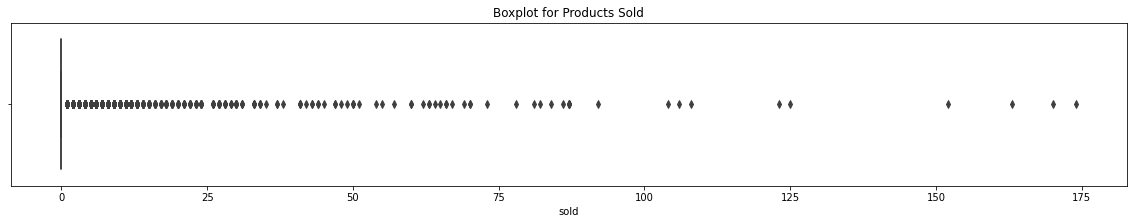

In [30]:
# Outliers in products sold.
fig, ax = plt.subplots(figsize=(20,3))
sns.boxplot(x=df['sold'])
plt.title('Boxplot for Products Sold')
plt.show()


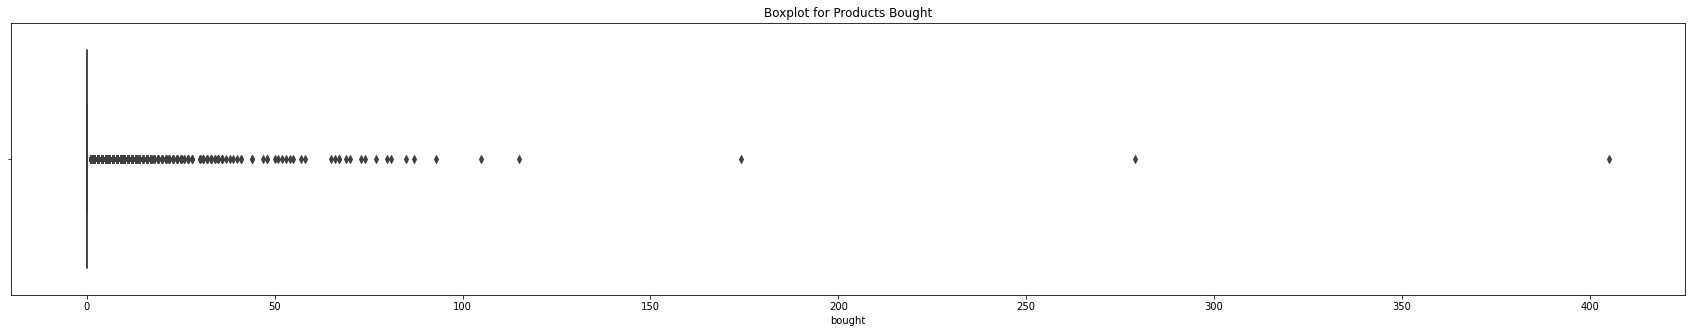

In [31]:
# Outliers in bought. 
fig, ax = plt.subplots(figsize=(30,5))
sns.boxplot(x=df['bought'])
plt.title('Boxplot for Products Bought')
plt.show()

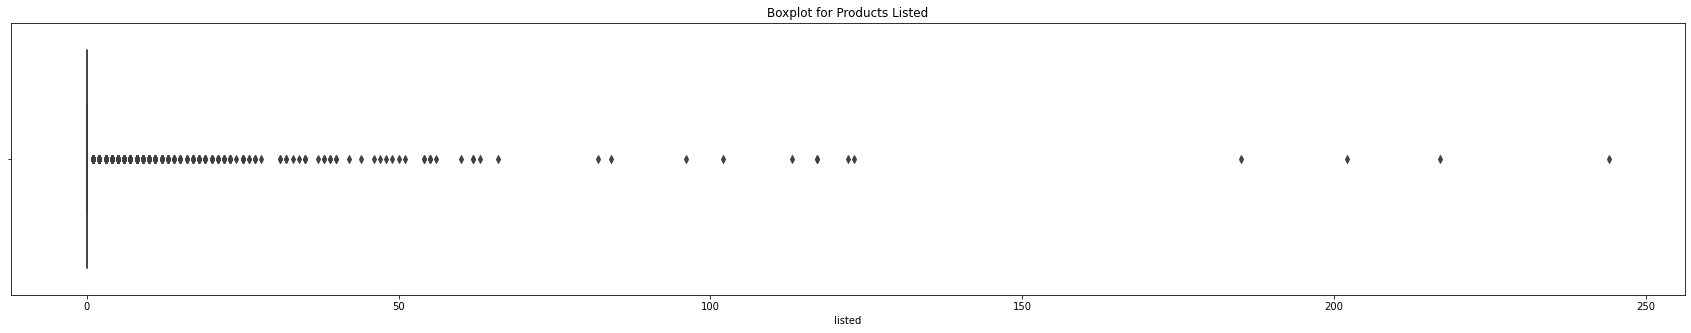

In [32]:
# Outliers in listed items. 
fig, ax = plt.subplots(figsize=(30,5))
sns.boxplot(x=df['listed'])
plt.title('Boxplot for Products Listed')
plt.show()

In [33]:
df.head()

,country,language,listed,sold,pass_rate,wished,bought,gender,has_any_app,android,ios,profile_pic,last_login,countryCode
0,Royaume-Uni,English,26,174,74.0,104,1,M,True,False,True,True,11,gb
1,Monaco,English,19,170,99.0,0,0,F,True,False,True,True,12,mc
2,France,French,33,163,94.0,10,3,F,True,False,True,False,11,fr
3,Etats-Unis,English,122,152,92.0,7,0,F,True,False,True,False,12,us
4,Etats-Unis,English,25,125,100.0,0,0,F,False,False,False,True,22,us


In [34]:
df.to_csv('df_csv_c2c.csv')

# UNIVARIATE ANALYSIS

In [35]:
#overall stats of the data
df.describe()

,listed,sold,pass_rate,wished,bought,last_login
count,33275.000000,33275.000000,33275.000000,33275.000000,33275.000000,33275.000000
mean,0.276995,0.361142,2.414645,4.614425,0.498663,420.031165
std,3.527470,3.655209,14.522921,43.273097,3.999454,251.471049
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,184.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,471.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,667.000000
max,244.000000,174.000000,100.000000,2635.000000,405.000000,709.000000


In [36]:
#number of unique records per column
for column in df: 
     
    # Select column contents by column    
    # name using [] operator 
    columnSeriesObj = df[column].nunique() 
    print('Colunm Name : ', column) 
    print('No. of unique items in Column: ', columnSeriesObj) 

Colunm Name :  country
No. of unique items in Column:  200
Colunm Name :  language
No. of unique items in Column:  5
Colunm Name :  listed
No. of unique items in Column:  65
Colunm Name :  sold
No. of unique items in Column:  75
Colunm Name :  pass_rate
No. of unique items in Column:  72
Colunm Name :  wished
No. of unique items in Column:  279
Colunm Name :  bought
No. of unique items in Column:  70
Colunm Name :  gender
No. of unique items in Column:  2
Colunm Name :  has_any_app
No. of unique items in Column:  2
Colunm Name :  android
No. of unique items in Column:  2
Colunm Name :  ios
No. of unique items in Column:  2
Colunm Name :  profile_pic
No. of unique items in Column:  2
Colunm Name :  last_login
No. of unique items in Column:  699
Colunm Name :  countryCode
No. of unique items in Column:  199


In [37]:
#Measures of central tendency and dispersion
#listed
print(f'Min: {df.listed.min()}')
print(f'Q1: {df.listed.quantile(.25)}')
print(f'Q2: {df.listed.quantile(.50)}')
print(f'Q3: {df.listed.quantile(.75)}')
print(f'Max: {df.listed.max()}')
print('*'*15)

print(f'Mean: {df.listed.mean()}')
print(f'Median: {df.listed.median()}')
print(f'Mode: {df.listed.mode().values[0]}')
print('*'*15)

print(f'Skew: {df.listed.skew()}')
print(f'Kurtosis: {df.listed.kurt()}')

Min: 0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Max: 244
***************
Mean: 0.2769947407963937
Median: 0.0
Mode: 0
***************
Skew: 37.71609582745722
Kurtosis: 1944.1448765227628


Key points on the Products listed data.

* The Skew is much greater than 1 which means that the distribution of the data is highly skewed. In this case positively (right) skewed.

* The Kurtosis is much greater than 3 making the data distribution Leptokurtic, which means that the distribution is longer, tails are fatter. Peak is higher and sharper than that of normally distributed data, that is to say that data are heavy-tailed or abundance of outliers.

In [38]:
#Measures of central tendency and dispersion
#sold
print(f'Min: {df.sold.min()}')
print(f'Q1: {df.sold.quantile(.25)}')
print(f'Q2: {df.sold.quantile(.50)}')
print(f'Q3: {df.sold.quantile(.75)}')
print(f'Max: {df.sold.max()}')
print('*'*15)

print(f'Mean: {df.sold.mean()}')
print(f'Median: {df.sold.median()}')
print(f'Mode: {df.sold.mode().values[0]}')
print('*'*15)

print(f'Skew: {df.sold.skew()}')
print(f'Kurtosis: {df.sold.kurt()}')

Min: 0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Max: 174
***************
Mean: 0.3611419984973704
Median: 0.0
Mode: 0
***************
Skew: 24.165032352097324
Kurtosis: 794.5330915173979


Key points on the Products sold data.

* The Skew is much greater than 1 which means that the distribution of the data is highly skewed. In this case positively (right) skewed.

* The Kurtosis is much greater than 3 making the data distribution Leptokurtic, which means that the distribution is longer, tails are fatter. Peak is higher and sharper than that of normally distributed data, that is to say that data are heavy-tailed or abundance of outliers.

In [39]:
#Measures of central tendency and dispersion
#pass rate
print(f'Min: {df.pass_rate.min()}')
print(f'Q1: {df.pass_rate.quantile(.25)}')
print(f'Q2: {df.pass_rate.quantile(.50)}')
print(f'Q3: {df.pass_rate.quantile(.75)}')
print(f'Max: {df.pass_rate.max()}')
print('*'*15)

print(f'Mean: {df.pass_rate.mean()}')
print(f'Median: {df.pass_rate.median()}')
print(f'Mode: {df.pass_rate.mode().values[0]}')
print('*'*15)

print(f'Skew: {df.pass_rate.skew()}')
print(f'Kurtosis: {df.pass_rate.kurt()}')

Min: 0.0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Max: 100.0
***************
Mean: 2.4146446280991736
Median: 0.0
Mode: 0.0
***************
Skew: 6.026301909917762
Kurtosis: 35.10129165179304


Key points on the Products Pass Rate data.

* The Skew is greater than 1 which means that the distribution of the data is highly skewed. In this case positively (right) skewed.

* The Kurtosis is greater than 3 making the data distribution Leptokurtic, which means that the distribution is longer, tails are fatter. Peak is higher and sharper than that of normally distributed data, that is to say that data are heavy-tailed or abundance of outliers.

In [40]:
#Measures of central tendency and dispersion
#wished
print(f'Min: {df.wished.min()}')
print(f'Q1: {df.wished.quantile(.25)}')
print(f'Q2: {df.wished.quantile(.50)}')
print(f'Q3: {df.wished.quantile(.75)}')
print(f'Max: {df.wished.max()}')
print('*'*15)

print(f'Mean: {df.wished.mean()}')
print(f'Median: {df.wished.median()}')
print(f'Mode: {df.wished.mode().values[0]}')
print('*'*15)

print(f'Skew: {df.wished.skew()}')
print(f'Kurtosis: {df.wished.kurt()}')

Min: 0
Q1: 0.0
Q2: 0.0
Q3: 1.0
Max: 2635
***************
Mean: 4.61442524417731
Median: 0.0
Mode: 0
***************
Skew: 28.681899984727348
Kurtosis: 1140.5737927262521


Key points on the Products Wished data.

* The Skew is much greater than 1 which means that the distribution of the data is highly skewed. In this case positively (right) skewed.

* The Kurtosis is much greater than 3 making the data distribution Leptokurtic, which means that the distribution is longer, tails are fatter. Peak is higher and sharper than that of normally distributed data, that is to say that data are heavy-tailed or abundance of outliers.

In [41]:
#Measures of central tendency and dispersion
#bought
print(f'Min: {df.bought.min()}')
print(f'Q1: {df.bought.quantile(.25)}')
print(f'Q2: {df.bought.quantile(.50)}')
print(f'Q3: {df.bought.quantile(.75)}')
print(f'Max: {df.bought.max()}')
print('*'*15)

print(f'Mean: {df.bought.mean()}')
print(f'Median: {df.bought.median()}')
print(f'Mode: {df.bought.mode().values[0]}')
print('*'*15)

print(f'Skew: {df.bought.skew()}')
print(f'Kurtosis: {df.bought.kurt()}')

Min: 0
Q1: 0.0
Q2: 0.0
Q3: 0.0
Max: 405
***************
Mean: 0.4986626596543952
Median: 0.0
Mode: 0
***************
Skew: 49.74349381956706
Kurtosis: 4063.2382273722633


Key points on the Products bought data.

* The Skew is much greater than 1 which means that the distribution of the data is highly skewed. In this case positively (right) skewed.

* The Kurtosis is much greater than 3 making the data distribution Leptokurtic, which means that the distribution is longer, tails are fatter. Peak is higher and sharper than that of normally distributed data, that is to say that data are heavy-tailed or abundance of outliers.

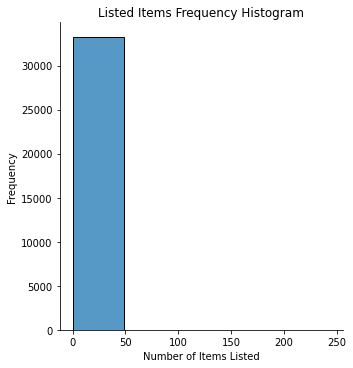

In [42]:
#Visual look at the listed data
sns.displot(df['listed'], kind='hist',bins=5, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Number of Items Listed")
plt.title("Listed Items Frequency Histogram")
plt.show()

Key point on the Products listed histogram.

* The histogram shows graphically that the data is not normally distributed.

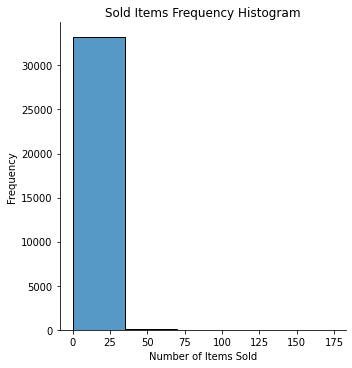

In [43]:
#Visual look at the no sold items
sns.displot(df['sold'], kind='hist',bins=5, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Number of Items Sold")
plt.title("Sold Items Frequency Histogram")
plt.show()

Key point on the Products sold histogram.

* The histogram shows graphically that the data is not normally distributed.

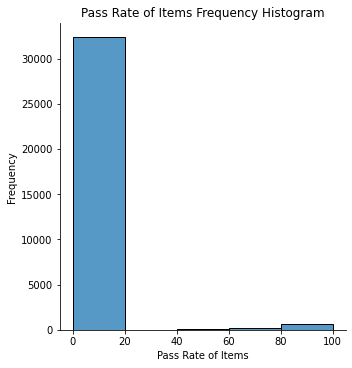

In [44]:
#Visual look at the pass rate data
sns.displot(df['pass_rate'], kind='hist',bins=5, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Pass Rate of Items")
plt.title("Pass Rate of Items Frequency Histogram")
plt.show()

Key point on the Products Pass Rate histogram.

* The histogram shows graphically that the data is not normally distributed and the presence of anomalies can be seen with the small number of records in the 60-100 range of Pass Rate which distorts the distribution of the data.

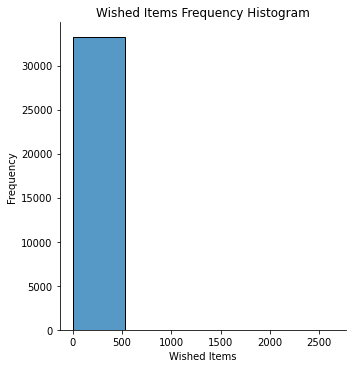

In [45]:
#Visual look at the wished data
sns.displot(df['wished'], kind='hist',bins=5, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Wished Items")
plt.title("Wished Items Frequency Histogram")
plt.show()

Key point on the Wished items histogram.

* The histogram shows graphically that the data is not normally distributed.


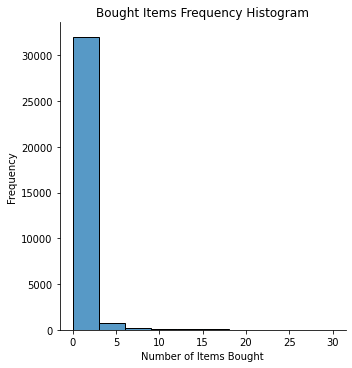

In [46]:
#Visual look at the no bought items
sns.displot(df['bought'], kind='hist',bins=[0,3,6,9,12,15,18,21,24,27,30], kde=False)
plt.ylabel("Frequency")
plt.xlabel("Number of Items Bought")
plt.title("Bought Items Frequency Histogram")
plt.show()

Key point on the Products Bought histogram.

* The histogram shows graphically that the data is not normally distributed and the presence of anomalies can be seen with the small number of records in the 5-15 range of Number of items bought which distorts the distribution of the data.

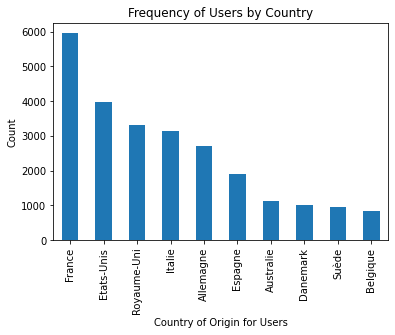

In [47]:
#Categorical data
#Country(Top 10)
top_10 = df['country'].value_counts().sort_values(ascending=False).head(10)
top_10.plot(kind='bar')
plt.xlabel('Country of Origin for Users')
plt.ylabel('Count')
plt.title('Frequency of Users by Country')
plt.show()


Key point on the Frequency of Users by Country Bar Chart.

* The bar chart shows the top 10 countries of origin of the users of the C2C fashion store website. France, United States and U.K. being the top 3 countries.

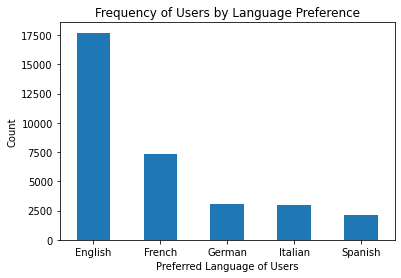

In [48]:
#Categorical data
#Language

df['language'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Preferred Language of Users')
plt.ylabel('Count')
plt.title('Frequency of Users by Language Preference')
plt.show()

Key point on the Frequency of Users by Language Preference Bar Chart.

* The bar chart shows the number of the users by language preference of the C2C fashion store website. English being the dominant language, followed by French and Italian concluding the top 3 languages.

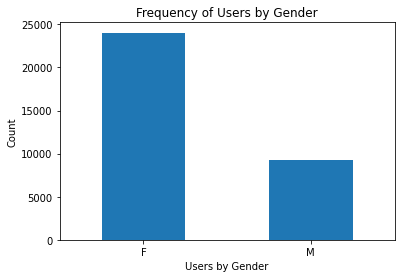

In [49]:
#Categorical data
#Gender

df['gender'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Users by Gender')
plt.ylabel('Count')
plt.title('Frequency of Users by Gender')
plt.show()

Key point on the Frequency of Users by Gender Bar Chart.

* The bar chart shows the proportion of the users by gender of the C2C fashion store website. Female (Women) can be seen to be the most users at about 4 times the number of men.

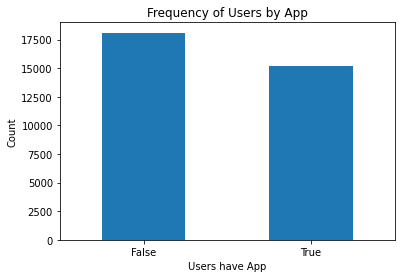

In [50]:
#Categorical data
#Has Any App

df['has_any_app'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Users have App')
plt.ylabel('Count')
plt.title('Frequency of Users by App')
plt.show()

Key point on the Frequency of Users by Application.

* The bar chart shows the proportion of the users of the C2C fashion store website by Use of Application. Majority of Users do not use an Application (this may point to them using internet browsers, which can be an area of improvement and/or investment).

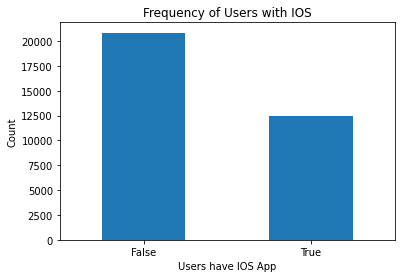

In [51]:
#Categorical data
#IOS

df['ios'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Users have IOS App')
plt.ylabel('Count')
plt.title('Frequency of Users with IOS')
plt.show()

Key point on the Frequency of Users with IOS.

* The bar chart shows that the number of users using IOS to access the C2C store is almost 1/3 those not using.

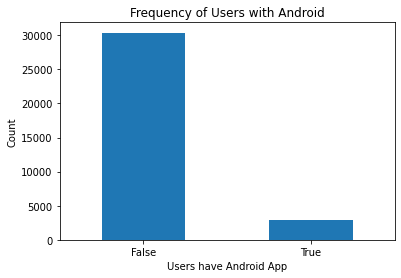

In [52]:
#Categorical data
#Android

df['android'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Users have Android App')
plt.ylabel('Count')
plt.title('Frequency of Users with Android')
plt.show()

Key point on the Frequency of Users with Android.

* The bar chart shows that the number of users using Android to access the C2C store is almost 1/10 of those not using.

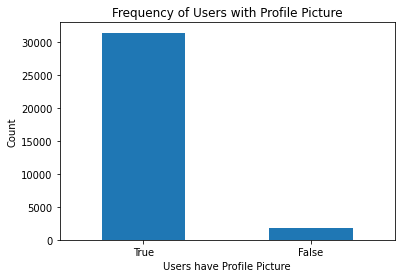

In [53]:
#Categorical data
#Has Profile Pic

df['profile_pic'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Users have Profile Picture')
plt.ylabel('Count')
plt.title('Frequency of Users with Profile Picture')
plt.show()



Key point on the Frequency of Users with a profile picture.

* The bar chart shows that an overwhelming majority of users have a profile picture which is interesting to note since this may point to the "soft side" of doing business as customers may prefer to transact business with individuals with a picture (personal touch). Though there's no information that the profile pictures in this case are strictly people's photos.

#BIVARIATE ANALYSIS

Bivariate analysis involves two variables. It aims to find out how these variables relate with each other.

NUMERICAL AND NUMERICAL VARIABLES

*   Here, we seek to find out correlation between two numerical variables.
*   This will be done using a scatter plot and calculationg the pearson coefficient.  Correlation coefficients between -.20 and .20 are generally considered weak, between .20 and .50 (positive or negative) are considered moderate, and above .50 (positive or negative) are considered strong.










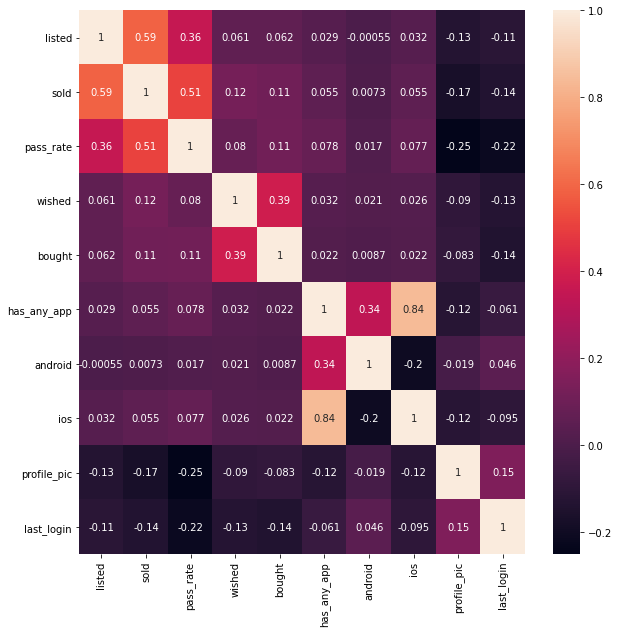

In [54]:
#a heatmap showing how all variables correlate
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 576x576 with 0 Axes>

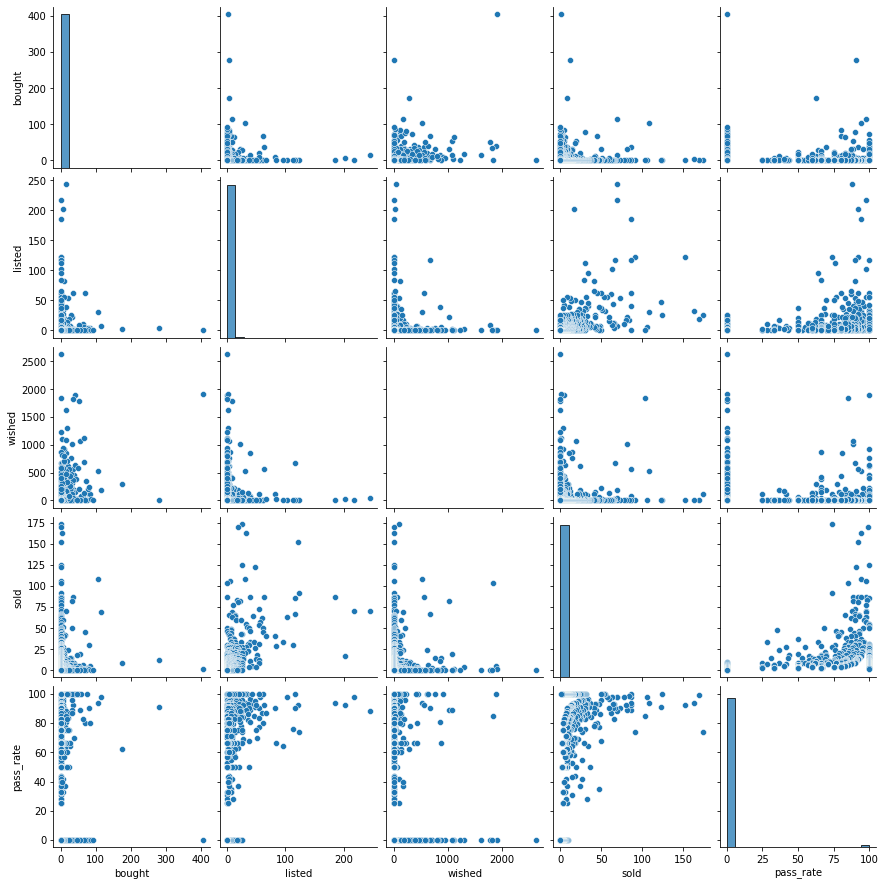

In [57]:
#a scatter plothowing how all variables correlate with each other
plt.figure(figsize = (8,8))
sns.pairplot(df[['bought','listed','wished','sold','pass_rate']])
plt.show()

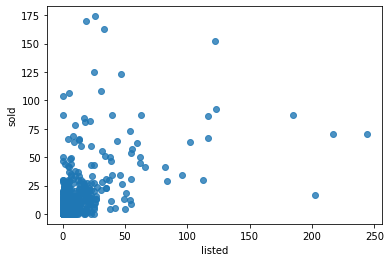

In [59]:
#scatter plot of number of items listed and number of items sold by a user
#the pearson coefficient is above .50 implying a strong correlation
sns.regplot(x = df["listed"], y = df["sold"], fit_reg=False)
df["listed"].corr(df["sold"]) 
plt.show()

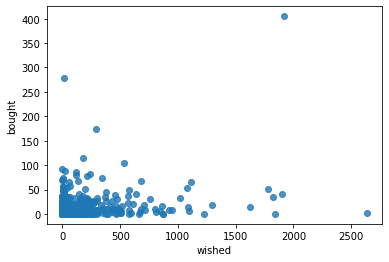

In [60]:
##scatter plot of number of items wished and number of items bought by a user
#the pearson coefficient is between .20 and .50 implying a moderate correlation
sns.regplot(x = df["wished"], y = df["bought"], fit_reg=False)
df["wished"].corr(df["bought"]) 
plt.show()

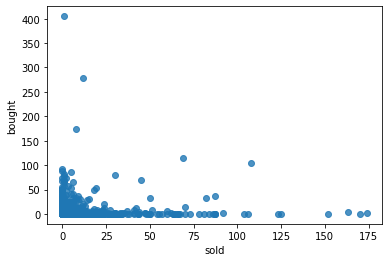

In [61]:
##scatter plot of number of items sold and number of items bought by a user
#the pearson coefficient is below .20 implying a weak correlation
sns.regplot(x = df["sold"], y = df["bought"], fit_reg=False)
df["sold"].corr(df["bought"])
plt.show()

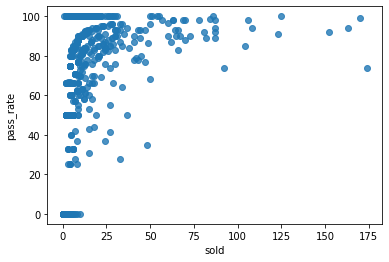

In [64]:
##scatter plot of number of items sold and pass rate of product 
#the pearson coefficient is above .50 implying a strong negative correlation
sns.regplot(x = df["sold"], y = df["pass_rate"], fit_reg=False)
df["sold"].corr(df["pass_rate"])
plt.show()

# EXPLORATORY DATA ANALYSIS

Number of products Sold by Gender.

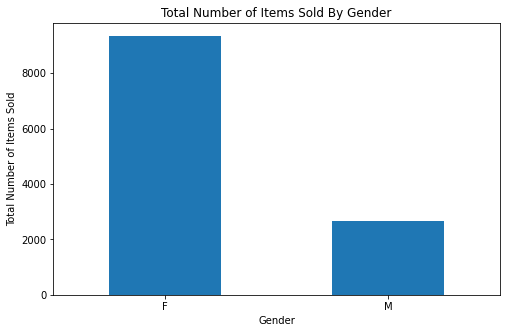

gender
F    9347
M    2670
Name: sold, dtype: int64


In [65]:
#No of sold by gender
sold_g = df.groupby(['gender'])['sold'].sum()
plt.figure(figsize = (8,5))
sold_g.plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Total Number of Items Sold')
plt.title('Total Number of Items Sold By Gender')
plt.show()
print(sold_g)

Number of products Bought by Gender.

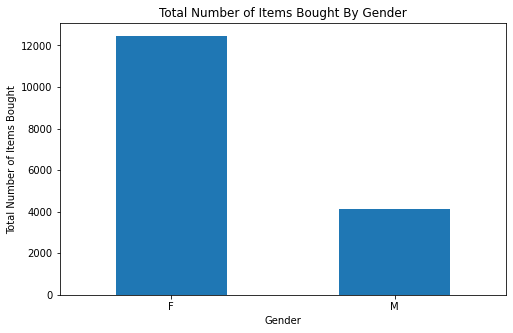

gender
F    12453
M     4140
Name: bought, dtype: int64


In [66]:
#No of bought by gender
bought_g = df.groupby(['gender'])['bought'].sum()
plt.figure(figsize = (8,5))
bought_g.plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Total Number of Items Bought')
plt.title('Total Number of Items Bought By Gender')
plt.show()
print(bought_g)

Percentage of male and female customers

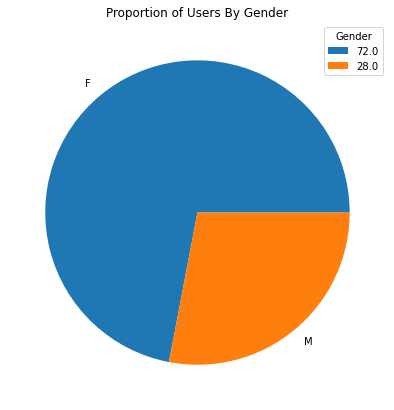

In [67]:
#Proportion of Users by Gender
gender = round((df['gender'].value_counts())/(len(df))*100)

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(gender, labels=gender.index) 

#legend
plt.legend(gender, title ="Gender") 
plt.title("Proportion of Users By Gender") 
  
# show plot 
plt.show() 

Number of products Sold by Country

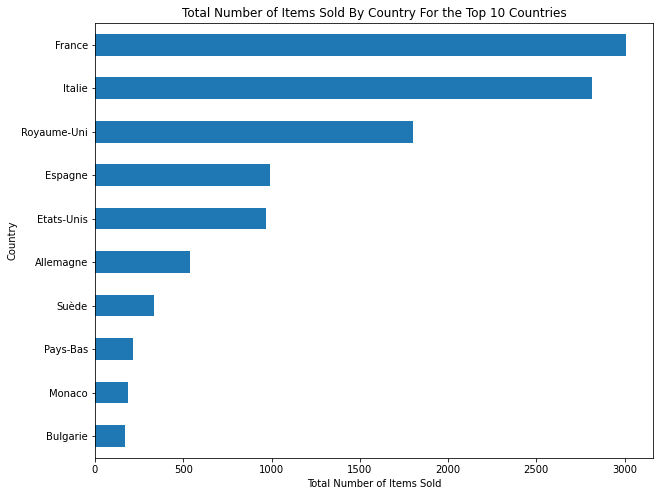

country
France         3010
Italie         2818
Royaume-Uni    1803
Espagne         990
Etats-Unis      966
Allemagne       536
Suède           336
Pays-Bas        214
Monaco          190
Bulgarie        170
Name: sold, dtype: int64


In [68]:
#No of sold by country for the top 10 countries
top_10_sold =  df.groupby(['country'])['sold'].sum().sort_values(ascending=False).head(10)
top_10_sold1 = top_10_sold.sort_values(ascending=True)
plt.figure(figsize = (10,8))
top_10_sold1.plot(kind='barh', rot=0)
plt.xlabel('Total Number of Items Sold')
plt.ylabel('Country')
plt.title('Total Number of Items Sold By Country For the Top 10 Countries')
plt.show()
print(top_10_sold)


Number of products Bought by Country.

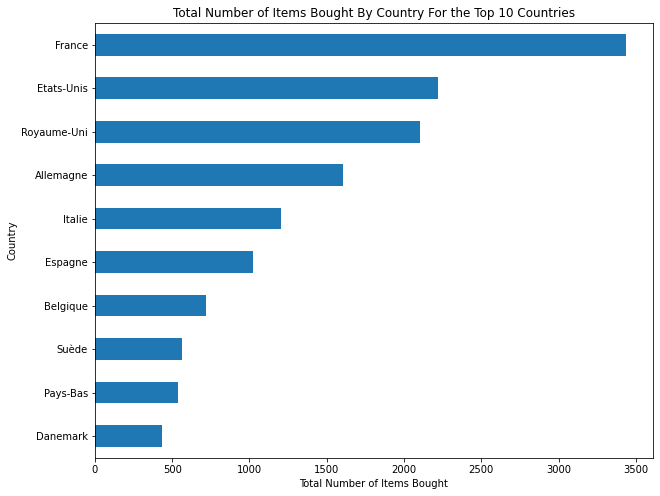

country
France         3439
Etats-Unis     2222
Royaume-Uni    2105
Allemagne      1606
Italie         1206
Espagne        1023
Belgique        718
Suède           564
Pays-Bas        537
Danemark        435
Name: bought, dtype: int64


In [69]:
#No of bought by country for the top 10 countries
top_10_bought =  df.groupby(['country'])['bought'].sum().sort_values(ascending=False).head(10)
top_10_bought1 = top_10_bought.sort_values(ascending=True)
plt.figure(figsize = (10,8))
top_10_bought1.plot(kind='barh', rot=0)
plt.xlabel('Total Number of Items Bought')
plt.ylabel('Country')
plt.title('Total Number of Items Bought By Country For the Top 10 Countries')
plt.show()
print(top_10_bought)

Quality control: what is the pass rate (quality) of products by country

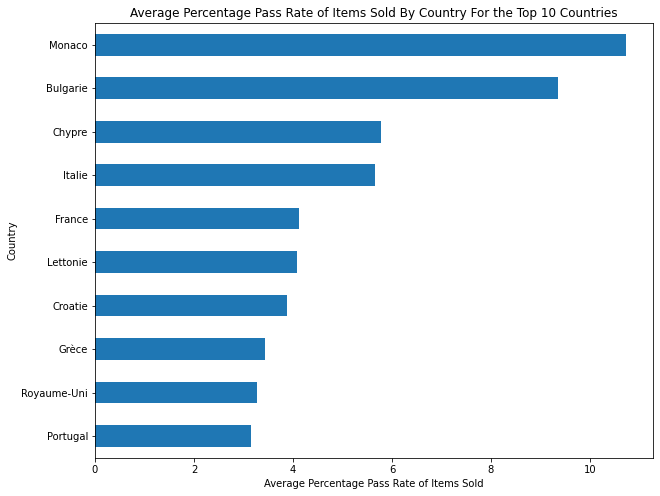

country
Monaco         10.735294
Bulgarie        9.352113
Chypre          5.770833
Italie          5.654080
France          4.123645
Lettonie        4.090909
Croatie         3.880952
Grèce           3.439189
Royaume-Uni     3.278911
Portugal        3.157576
Name: pass_rate, dtype: float64


In [70]:
#Top 10 countries by product pass rate (% rating of the products to be sold meeting the sellers description)
top_10_pass =  df.groupby(['country'])['pass_rate'].mean().sort_values(ascending=False).head(10)
top_10_pass1 = top_10_pass.sort_values(ascending=True)
plt.figure(figsize = (10,8))
top_10_pass1.plot(kind='barh', rot=0)
plt.xlabel('Average Percentage Pass Rate of Items Sold')
plt.ylabel('Country')
plt.title('Average Percentage Pass Rate of Items Sold By Country For the Top 10 Countries')
plt.show()
print(top_10_pass)

In [71]:
#Bottom 10 countries (Alphabetically) by product pass rate (% rating of the products to be sold meeting the sellers description)
bottom_10_pass =  df.groupby(['country'])['pass_rate'].mean().sort_values(ascending=True).head(10)
print(bottom_10_pass)

country
Afghanistan    0.0
Moldavie       0.0
Mongolie       0.0
Myanmar        0.0
Namibie        0.0
Nepal          0.0
Nicaragua      0.0
Niger          0.0
Nigeria        0.0
Norvège        0.0
Name: pass_rate, dtype: float64


Number of products Sold by Country and gender top 10 records.

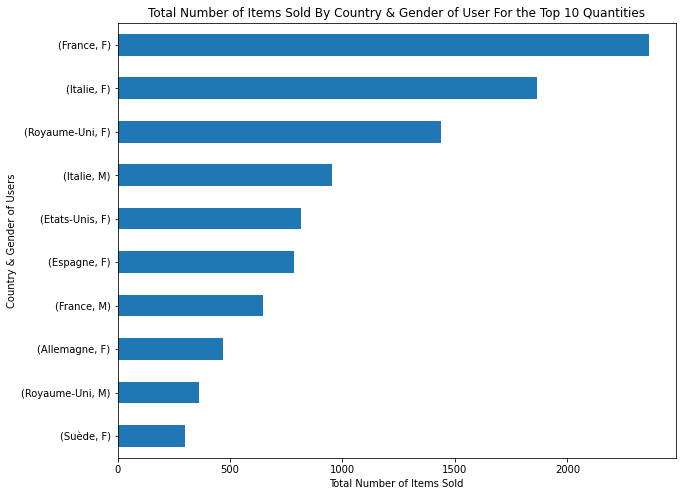

country      gender
France       F         2363
Italie       F         1863
Royaume-Uni  F         1440
Italie       M          955
Etats-Unis   F          816
Espagne      F          786
France       M          647
Allemagne    F          468
Royaume-Uni  M          363
Suède        F          301
Name: sold, dtype: int64


In [72]:
#No of sold by country and gender top 10 records
top_10_soldg =  df.groupby(['country','gender'])['sold'].sum().sort_values(ascending=False).head(10)
top_10_soldg1 = top_10_soldg.sort_values(ascending=True)
plt.figure(figsize = (10,8))
top_10_soldg1.plot(kind='barh', rot=0)
plt.xlabel('Total Number of Items Sold')
plt.ylabel('Country & Gender of Users')
plt.title('Total Number of Items Sold By Country & Gender of User For the Top 10 Quantities')
plt.show()
print(top_10_soldg)

Number of products Bought by Country and gender top 10 records.

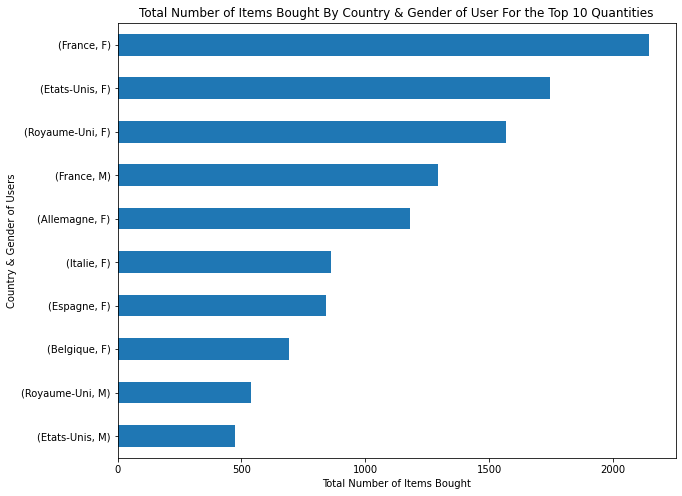

country      gender
France       F         2145
Etats-Unis   F         1747
Royaume-Uni  F         1566
France       M         1294
Allemagne    F         1181
Italie       F          862
Espagne      F          843
Belgique     F          692
Royaume-Uni  M          539
Etats-Unis   M          475
Name: bought, dtype: int64


In [73]:
#No of bought by country and gender top 10 records
top_10_boughtg =  df.groupby(['country','gender'])['bought'].sum().sort_values(ascending=False).head(10)
top_10_boughtg1 = top_10_boughtg.sort_values(ascending=True)
plt.figure(figsize = (10,8))
top_10_boughtg1.plot(kind='barh', rot=0)
plt.xlabel('Total Number of Items Bought')
plt.ylabel('Country & Gender of Users')
plt.title('Total Number of Items Bought By Country & Gender of User For the Top 10 Quantities')
plt.show()
print(top_10_boughtg)

Number of sold items by language preference

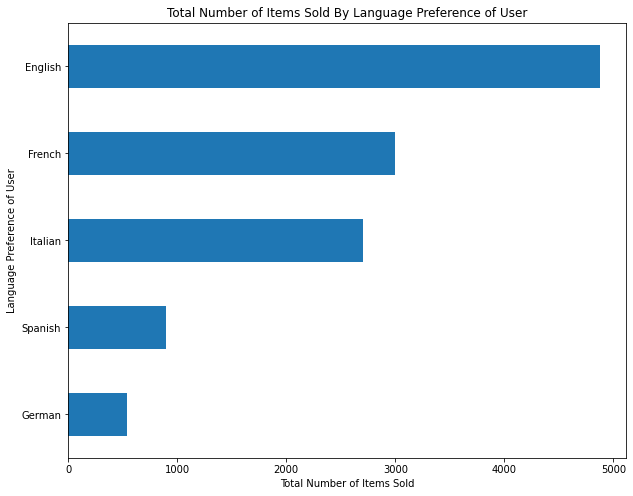

          sold  % Total Sold Items
language                          
English   4873                41.0
French    3000                25.0
Italian   2704                23.0
Spanish    901                 7.0
German     539                 4.0


In [74]:
#no of sold by language
sold_lang =  df.groupby(['language'])['sold'].sum().sort_values(ascending=True)
plt.figure(figsize = (10,8))
sold_lang.plot(kind='barh', rot=0)
plt.xlabel('Total Number of Items Sold')
plt.ylabel('Language Preference of User')
plt.title('Total Number of Items Sold By Language Preference of User')
plt.show()
#print(sold_lang.sort_values(ascending=False))
sl = pd.DataFrame(sold_lang)
sl['% Total Sold Items'] =  round(sold_lang/df.sold.sum()*100)
print(sl.sort_values(by='sold', ascending=False))

Number of bought items by language preference

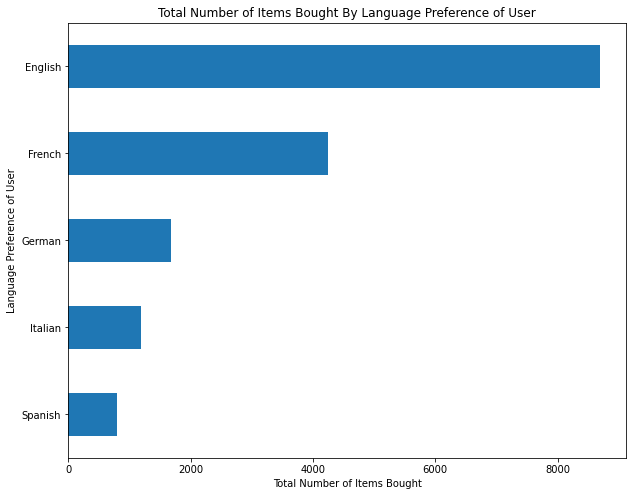

          bought  % Total Bought Items
language                              
English     8687                  52.0
French      4253                  26.0
German      1676                  10.0
Italian     1185                   7.0
Spanish      792                   5.0


In [75]:
#no of bought by language
bought_lang =  df.groupby(['language'])['bought'].sum().sort_values(ascending=True)
plt.figure(figsize = (10,8))
bought_lang.plot(kind='barh', rot=0)
plt.xlabel('Total Number of Items Bought')
plt.ylabel('Language Preference of User')
plt.title('Total Number of Items Bought By Language Preference of User')
plt.show()
bl = pd.DataFrame(bought_lang)
bl['% Total Bought Items'] =  round(bought_lang/df.bought.sum()*100)
print(bl.sort_values(by='bought', ascending=False))

Number of sold items by Users with an App or not

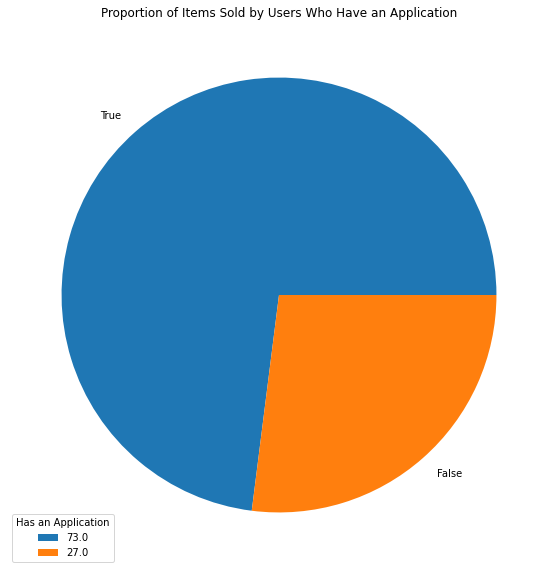

             sold  % Total Sold Items
has_any_app                          
True         8791                73.0
False        3226                27.0


In [76]:
#No of sold items by users with App or Not
sold_app =  df.groupby(['has_any_app'])['sold'].sum().sort_values(ascending=False)
sold_app1 = round((sold_app/df.sold.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(sold_app1, labels=sold_app1.index) 

#legend
plt.legend(sold_app1, title ="Has an Application") 
plt.title("Proportion of Items Sold by Users Who Have an Application") 
  
# show plot 
plt.show() 

sa = pd.DataFrame(sold_app)
sa['% Total Sold Items'] =  round(sold_app/df.sold.sum()*100)
print(sa.sort_values(by='sold', ascending=False))

Number of bought items by Users with an App or not

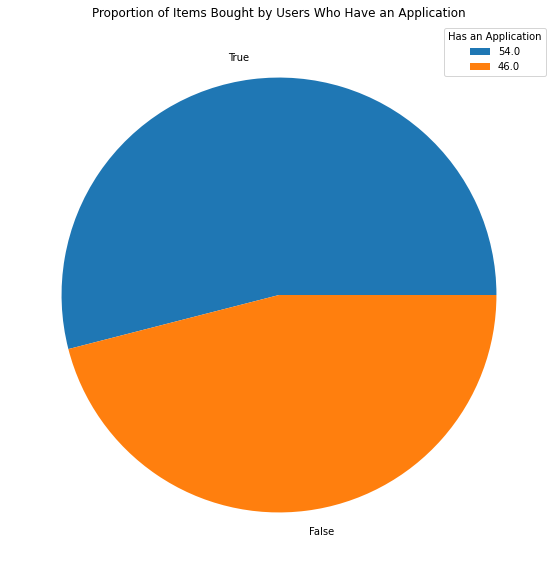

             bought  % Total Bought Items
has_any_app                              
True           9029                  54.0
False          7564                  46.0


In [77]:
#No of bought items by users with App or Not
bought_app =  df.groupby(['has_any_app'])['bought'].sum().sort_values(ascending=False)
bought_app1 = round((bought_app/df.bought.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(bought_app1, labels=bought_app1.index) 

#legend
plt.legend(bought_app1, title ="Has an Application") 
plt.title("Proportion of Items Bought by Users Who Have an Application") 
  
# show plot 
plt.show() 

ba = pd.DataFrame(bought_app)
ba['% Total Bought Items'] =  round(bought_app/df.bought.sum()*100)
print(ba.sort_values(by='bought', ascending=False))

Number of sold items by Users with IOS

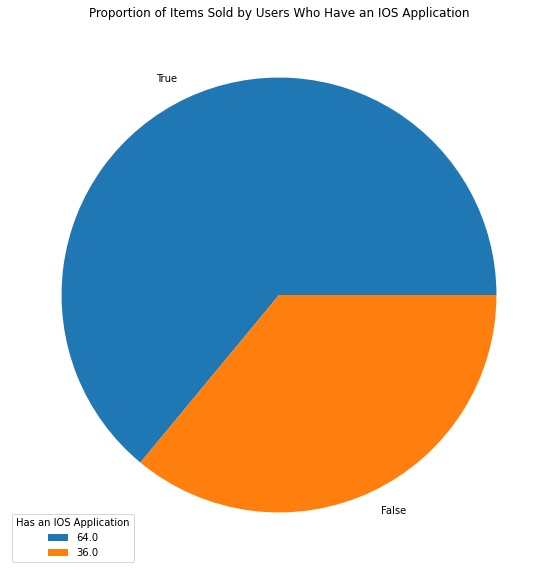

       sold  % Total Sold Items
ios                            
True   7724                64.0
False  4293                36.0


In [78]:
#No of sold items by users with IOS
sold_ios =  df.groupby(['ios'])['sold'].sum().sort_values(ascending=False)
sold_ios1 = round((sold_ios/df.sold.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(sold_ios1, labels=sold_ios1.index) 

#legend
plt.legend(sold_ios1, title ="Has an IOS Application") 
plt.title("Proportion of Items Sold by Users Who Have an IOS Application") 
  
# show plot 
plt.show() 

ios = pd.DataFrame(sold_ios)
ios['% Total Sold Items'] =  round(sold_ios/df.sold.sum()*100)
print(ios.sort_values(by='sold', ascending=False))

Number of bought items by Users with IOS

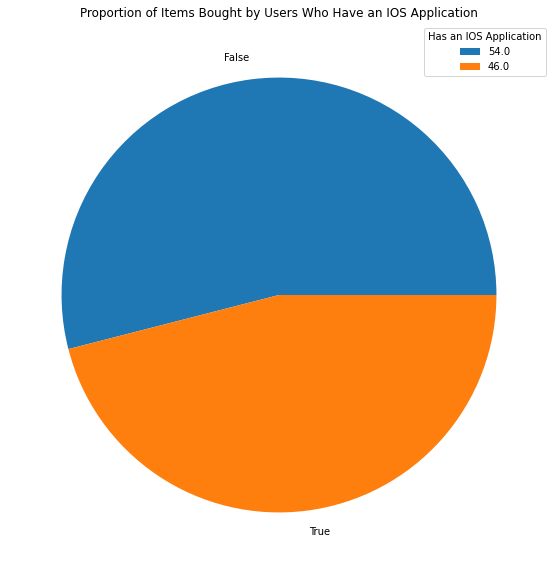

       bought  % Total Sold Items
ios                              
False    8945                54.0
True     7648                46.0


In [79]:
#No of bought items by users with IOS
bought_ios =  df.groupby(['ios'])['bought'].sum().sort_values(ascending=False)
bought_ios1 = round((bought_ios/df.bought.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(bought_ios1, labels=bought_ios1.index) 

#legend
plt.legend(bought_ios1, title ="Has an IOS Application") 
plt.title("Proportion of Items Bought by Users Who Have an IOS Application") 
  
# show plot 
plt.show() 

iosb = pd.DataFrame(bought_ios)
iosb['% Total Sold Items'] =  round(bought_ios/df.bought.sum()*100)
print(iosb.sort_values(by='bought', ascending=False))

Number of sold items by Users with Android

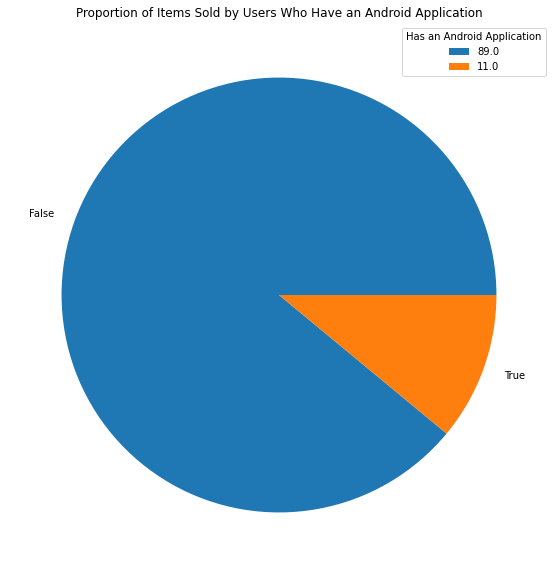

          sold  % Total Sold Items
android                           
False    10718                89.0
True      1299                11.0


In [80]:
#No of sold items by users with Android
sold_android =  df.groupby(['android'])['sold'].sum().sort_values(ascending=False)
sold_android1 = round((sold_android/df.sold.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(sold_android1, labels=sold_android1.index) 

#legend
plt.legend(sold_android1, title ="Has an Android Application") 
plt.title("Proportion of Items Sold by Users Who Have an Android Application") 
  
# show plot 
plt.show() 

android = pd.DataFrame(sold_android)
android['% Total Sold Items'] =  round(sold_android/df.sold.sum()*100)
print(android.sort_values(by='sold', ascending=False))

Number of bought items by Users with Android

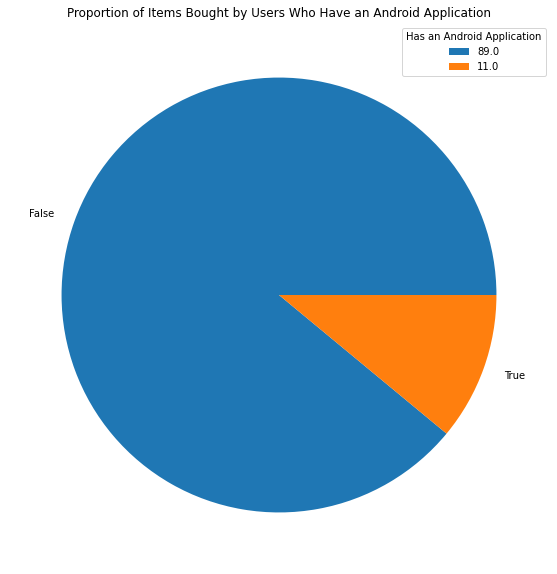

         bought  % Total Sold Items
android                            
False     14815                89.0
True       1778                11.0


In [81]:
#No of bought items by users with Android
bought_android =  df.groupby(['android'])['bought'].sum().sort_values(ascending=False)
bought_android1 = round((bought_android/df.bought.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(bought_android1, labels=bought_android1.index) 

#legend
plt.legend(bought_android1, title ="Has an Android Application") 
plt.title("Proportion of Items Bought by Users Who Have an Android Application") 
  
# show plot 
plt.show() 

androidb = pd.DataFrame(bought_android)
androidb['% Total Sold Items'] =  round(bought_android/df.bought.sum()*100)
print(androidb.sort_values(by='bought', ascending=False))

Quantity in % of items sold to Users with IOS, Android and No App

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


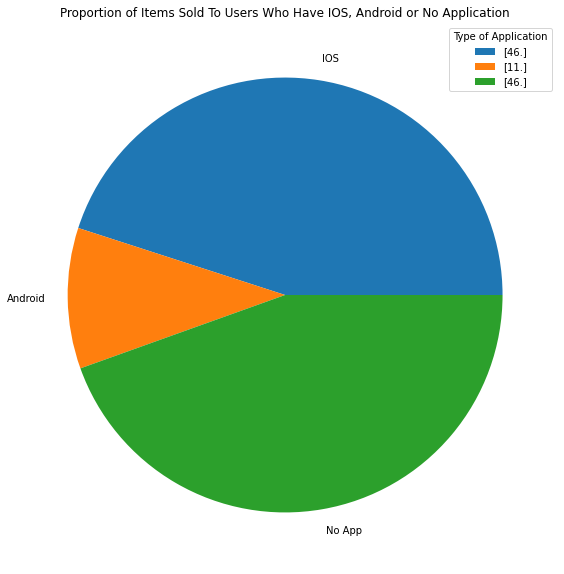

In [82]:
#Quantity of products sold to IOS users compared to Android and those without any App
sumBought = df.bought.sum()
i = df.loc[df['ios'] ==True]
i1 = i.groupby('ios')['bought'].sum()
x1 = i1.values
x1pct = np.round((x1/sumBought)*100,0)

a = df.loc[df['android'] ==True]
a1 = a.groupby('android')['bought'].sum()
x2 = a1.values
x2pct = np.round((x2/sumBought)*100)

all = df.loc[df['has_any_app'] ==False]
all1 = all.groupby('has_any_app')['bought'].sum()
x3 = all1.values
x3pct = np.round((x3/sumBought)*100)

l = [x1,x2,x3]
l_pct = [x1pct,x2pct,x3pct]

#Pie Chart

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(l, labels=['IOS', 'Android', 'No App']) 

#legend
plt.legend(l_pct, title ="Type of Application") 
plt.title("Proportion of Items Sold To Users Who Have IOS, Android or No Application") 
  
# show plot 
plt.show() 
print()


Number of sold items by Users with Profile Pic

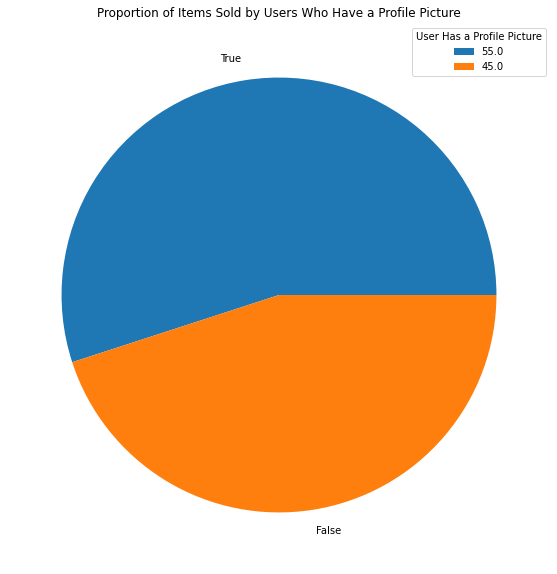

             sold  % Total Sold Items
profile_pic                          
True         6608                55.0
False        5409                45.0


In [83]:
#No of sold items by users with & without profile pic
sold_pp =  df.groupby(['profile_pic'])['sold'].sum().sort_values(ascending=False)
sold_pp1 = round((sold_pp/df.sold.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(sold_pp1, labels=sold_pp1.index) 

#legend
plt.legend(sold_pp1, title ="User Has a Profile Picture") 
plt.title("Proportion of Items Sold by Users Who Have a Profile Picture") 
  
# show plot 
plt.show() 

pp = pd.DataFrame(sold_pp)
pp['% Total Sold Items'] =  round(sold_pp/df.sold.sum()*100)
print(pp.sort_values(by='sold', ascending=False))

Number of bought items by Users with Profile Pic

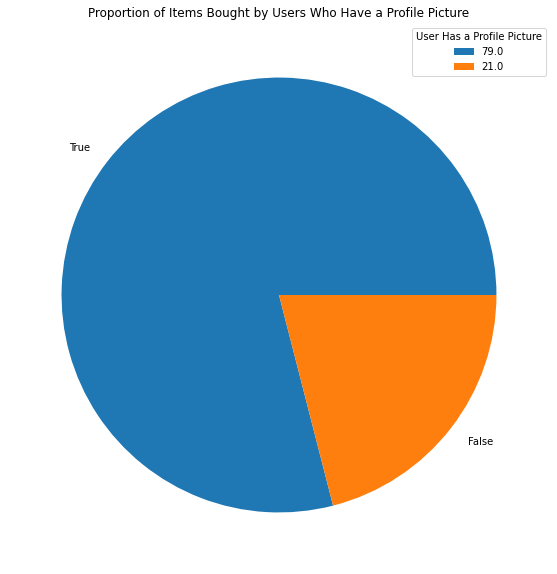

             bought  % Total Sold Items
profile_pic                            
True          13111                79.0
False          3482                21.0


In [84]:
#No of bought items by users with & without profile pic
bought_pp =  df.groupby(['profile_pic'])['bought'].sum().sort_values(ascending=False)
bought_pp1 = round((bought_pp/df.bought.sum())*100)

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(bought_pp1, labels=bought_pp1.index) 

#legend
plt.legend(bought_pp1, title ="User Has a Profile Picture") 
plt.title("Proportion of Items Bought by Users Who Have a Profile Picture") 
  
# show plot 
plt.show() 

pp1 = pd.DataFrame(bought_pp)
pp1['% Total Sold Items'] =  round(bought_pp/df.bought.sum()*100)
print(pp1.sort_values(by='bought', ascending=False))

# MULTIVARIATE ANALYSIS

Linear Discriminant Analysis

Has Any App LDA

In [104]:
X = df.drop(['countryCode','has_any_app','android','ios'], axis=1)
y = df['has_any_app']

In [105]:
#convert text data into numerical (encode)
from sklearn.preprocessing import LabelEncoder
#pd.options.mode.chained_assignment = None  # default='warn'
en = LabelEncoder()
X['country'] = en.fit_transform(X['country'])
X['language'] = en.fit_transform(X['language'])
X['gender'] = en.fit_transform(X['gender'])
X['profile_pic'] = en.fit_transform(X['profile_pic'])

In [106]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#standardise the data

#initialise it
lda = LDA()

lda_= lda.fit(X, y)
lda_feat = lda_.transform(X)

#show co-efficients of the columns
lda_.coef_

array([[-2.66990073e-04,  4.42734471e-02, -8.09624379e-03,
         1.04777331e-02,  5.43446805e-03,  7.62839197e-04,
        -1.75595092e-03,  2.51041511e-01, -9.25031824e-01,
        -3.24940610e-04]])

In [107]:
#creating a df to store the features that have highest co-efficients
feat_matters = pd.DataFrame(index=X.columns.values, data = lda_.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
gender,0.251042
language,0.044273
sold,0.010478
pass_rate,0.005434
wished,0.000763
country,-0.000267
last_login,-0.000325
bought,-0.001756
listed,-0.008096
profile_pic,-0.925032


Has App Model


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [111]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3426  214]
 [2612  403]]
Accuracy0.5753568745304283


Gender LDA

In [113]:
X = df.drop(['countryCode','gender','android','ios'], axis=1)
y = df['gender']

In [114]:
#convert text data into numerical (encode)
from sklearn.preprocessing import LabelEncoder
#pd.options.mode.chained_assignment = None  # default='warn'
en = LabelEncoder()
X['country'] = en.fit_transform(X['country'])
X['language'] = en.fit_transform(X['language'])
X['has_any_app'] = en.fit_transform(X['has_any_app'])
X['profile_pic'] = en.fit_transform(X['profile_pic'])
#X['ios'] = en.fit_transform(X['ios'])
#X['android'] = en.fit_transform(X['android'])

X.head(1)

,country,language,listed,sold,pass_rate,wished,bought,has_any_app,profile_pic,last_login
0,145,0,26,174,74.0,104,1,1,1,11


In [115]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#standardise the data

#initialise it
lda = LDA()

lda_= lda.fit(X, y)
lda_feat = lda_.transform(X)

#show co-efficients of the columns
lda_.coef_

array([[-1.56133956e-04,  8.00173863e-02, -5.55370534e-03,
         4.18797514e-03, -3.98769673e-04, -1.07727226e-03,
         8.70417970e-03,  2.51041511e-01,  6.61234952e-02,
         9.93977552e-04]])

In [116]:
#creating a df to store the features that have highest co-efficients
feat_matters = pd.DataFrame(index=X.columns.values, data = lda_.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
has_any_app,0.251042
language,0.080017
profile_pic,0.066123
bought,0.008704
sold,0.004188
last_login,0.000994
country,-0.000156
pass_rate,-0.000399
wished,-0.001077
listed,-0.005554


Gender Model

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [120]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[4809    0]
 [1846    0]]
Accuracy0.7226145755071375
